Press 'SPACE' to capture the image, 'ESC' to exit
✅ Image captured and saved as captured_image.jpg


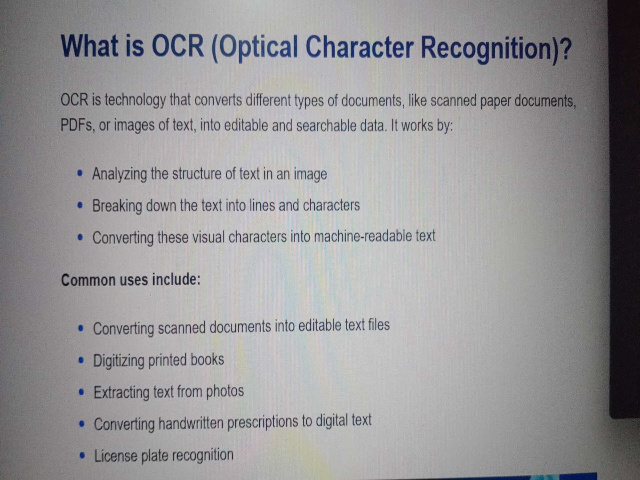


📜 Extracted Text:
 Ris technology that converts different types of documents, like scanned paper docu
PDFs, or images of text, into editable and searchable data. It works by:

© Analyzing the structure of text in an image
* Breaking down the text into lines and characters

® Converting these visual characters into machine-readable text

Common uses include:

® Converling scanned documents into editable text files
® Digitizing printed books

© Extracting text from photos

© Converting handwritten prescriptions to digital text
_® License plate recognition



In [1]:
import cv2
import pytesseract as pt
from PIL import Image
from IPython.display import display

IP_WEBCAM_URL = "http://192.168.143.123:8080/video"  

pt.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

FRAME_WIDTH = 640   
FRAME_HEIGHT = 480  

cap = cv2.VideoCapture(IP_WEBCAM_URL)

if not cap.isOpened():
    print("❌ Error: Could not connect to IP Webcam. Check IP & Port!")
    exit()

print("Press 'SPACE' to capture the image, 'ESC' to exit")

while True:
    ret, frame = cap.read()
    if not ret:
        print("❌ Failed to fetch frame. Check your mobile IP webcam connection.")
        break

    frame_resized = cv2.resize(frame, (FRAME_WIDTH, FRAME_HEIGHT))

    cv2.imshow("Live Capture - Press SPACE to capture", frame_resized)

    key = cv2.waitKey(1)
    if key == 27:  
        print("❌ Exiting...")
        break
    elif key == 32:  
        img_path = "captured_image.jpg"
        cv2.imwrite(img_path, frame_resized)  
        print(f"✅ Image captured and saved as {img_path}")
        break

cap.release()
cv2.destroyAllWindows()

try:
    img = Image.open(img_path)
    display(img)

    text = pt.image_to_string(img)
    print("\n📜 Extracted Text:\n", text)

except FileNotFoundError:
    print("❌ Error: Captured image not found!")

except OSError:
    print("❌ Error: The file could not be opened. Ensure it's a valid image.")

except Exception as e:
    print(f"❌ Unexpected Error: {e}")
